In [34]:
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

import matplotlib.pyplot as plt


In [2]:
(mnist_x1, mnist_y1),(mnist_x2,mnist_y2) = mnist.load_data()
(cifar_x1, cifar_y1),(cifar_x2,cifar_y2) = cifar10.load_data()

In [14]:
test = mnist_x1[mnist_y1 == 1][:10]

In [23]:
test1 = test[0].copy()

In [24]:
test1[test1>0] = 1

In [26]:
pd.DataFrame(test1)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [27]:
test[0][test[0] > 0]

array([124, 253, 255,  63,  96, 244, 251, 253,  62, 127, 251, 251, 253,
        62,  68, 236, 251, 211,  31,   8,  60, 228, 251, 251,  94, 155,
       253, 253, 189,  20, 253, 251, 235,  66,  32, 205, 253, 251, 126,
       104, 251, 253, 184,  15,  80, 240, 251, 193,  23,  32, 253, 253,
       253, 159, 151, 251, 251, 251,  39,  48, 221, 251, 251, 172, 234,
       251, 251, 196,  12, 253, 251, 251,  89, 159, 255, 253, 253,  31,
        48, 228, 253, 247, 140,   8,  64, 251, 253, 220,  64, 251, 253,
       220,  24, 193, 253, 220], dtype=uint8)

In [29]:
mnist_x1.shape

(60000, 28, 28)

In [38]:
model = Sequential(
    [
        Dense(512,activation='relu',input_shape=(28*28,)),
        keras.layers.BatchNormalization(),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [39]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics =['accuracy'])

In [40]:
model.fit(mnist_x1.reshape(-1,28*28),
         to_categorical(mnist_y1),
         epochs = 2,
         validation_data=(mnist_x2.reshape(-1,28*28),to_categorical(mnist_y2)))

Epoch 1/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1941 - accuracy: 0.9416 - val_loss: 0.1335 - val_accuracy: 0.9662
Epoch 2/2
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1090 - accuracy: 0.9686 - val_loss: 0.1101 - val_accuracy: 0.9733


In [45]:
model1 = Sequential(
   [ 
    Conv2D(10,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    Conv2D(30,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    Dense(10,activation='softmax')
   ]
)

In [46]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 30)        2730      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                      

In [48]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
mnist_x1.shape

(60000, 28, 28)

In [51]:
model1.fit(
    mnist_x1.reshape(-1,28,28,1),
    to_categorical(mnist_y1),
    epochs=10,
    validation_data = (mnist_x2.reshape(-1,28,28,1), to_categorical(mnist_y2))
)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1278 - accuracy: 0.9615 - val_loss: 0.0574 - val_accuracy: 0.9799
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0491 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0382 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0355 -

In [59]:
a = np.argmax(model1.predict(mnist_x2.reshape(-1,28,28,1)),axis=1) == mnist_y2

313/313 [==============================] - 1s 4ms/step


1/1 [==============================] - 0s 23ms/step
실제값은 3 ===> 예측값은 5


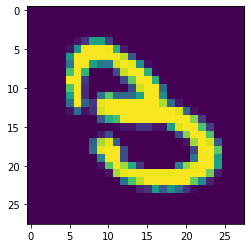

1/1 [==============================] - 0s 20ms/step
실제값은 4 ===> 예측값은 9


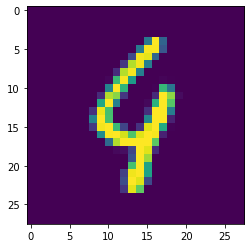

1/1 [==============================] - 0s 17ms/step
실제값은 2 ===> 예측값은 7


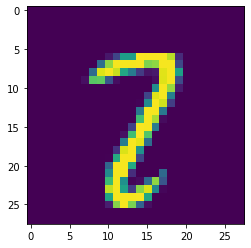

1/1 [==============================] - 0s 18ms/step
실제값은 5 ===> 예측값은 3


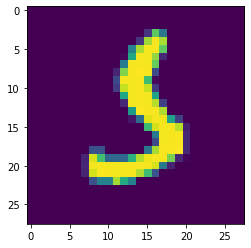

1/1 [==============================] - 0s 17ms/step
실제값은 6 ===> 예측값은 0


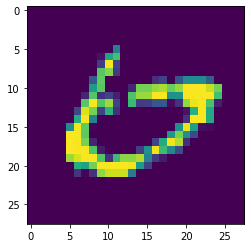

1/1 [==============================] - 0s 18ms/step
실제값은 4 ===> 예측값은 9


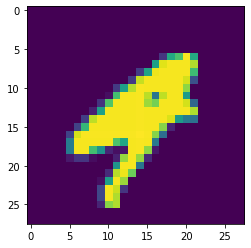

1/1 [==============================] - 0s 18ms/step
실제값은 3 ===> 예측값은 5


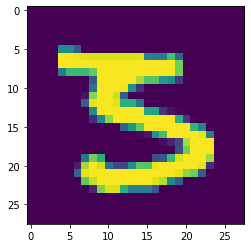

1/1 [==============================] - 0s 21ms/step
실제값은 8 ===> 예측값은 2


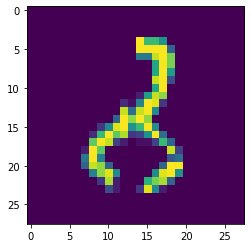

1/1 [==============================] - 0s 20ms/step
실제값은 2 ===> 예측값은 1


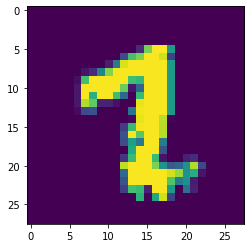

1/1 [==============================] - 0s 19ms/step
실제값은 4 ===> 예측값은 9


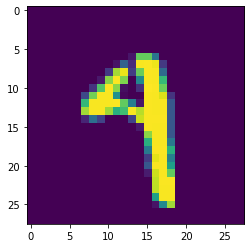

In [66]:
j = 0
for i in mnist_x2[~a][0:10]:
    pred = np.argmax(model1.predict(i.reshape(-1,28,28,1)))
    real = mnist_y2[~a][j]
    print(f'실제값은 {real} ===> 예측값은 {pred}')
    plt.imshow(i)
    plt.show()
    j += 1

In [67]:
cifar_dic = {
    "airplane" : 0,
"automobile" : 1,
"bird" : 2,
"cat" : 3,
"deer" : 4,
"dog" : 5,
"frog" : 6,
"horse" : 7,
"ship" : 8,
"truck" : 9,
}

In [68]:
cifar_dic = { v:k for k,v in cifar_dic.items()}

In [70]:
from keras.datasets import cifar10 

In [71]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_validation, y_train, y_validation =\
train_test_split(X_train_full, y_train_full,test_size=.2)

In [78]:
X_train.shape
y_train.shape

(40000, 1)

In [82]:
X_train.shape[1:]

(32, 32, 3)

In [76]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Input, Dropout, Flatten
from keras.utils import to_categorical

In [83]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_validation = to_categorical(y_validation)

In [99]:
model1 = Sequential()
model1.add(Dense(128,activation='relu',input_shape=(32*32*3,)))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [100]:
model1.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [102]:
model1.fit(X_train.reshape(-1,32*32*3),
          y_train,
          epochs=20,
          validation_data=(X_validation.reshape(-1,32*32*3), y_validation))

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2574 - accuracy: 0.2323 - val_loss: 2.0947 - val_accuracy: 0.2148
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2952 - accuracy: 0.1076 - val_loss: 2.3033 - val_accuracy: 0.0939
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3030 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.1006
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3032 - val_accuracy: 0.0940
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.0969
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3029 - accuracy: 0.0969 - val_loss: 2.3028 - val_accuracy: 0.0998
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3032 - val_accuracy:

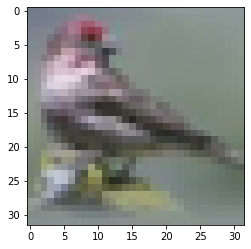

In [108]:
plt.imshow(X_train[157])

In [109]:
cifar_dic[np.argmax(y_train[157])]

'bird'

In [120]:
conv_model = Sequential()
conv_model.add(Conv2D(50,(3,3),activation='tanh',input_shape=(X_train.shape[1:])))
conv_model.add(Dropout(0.5))
conv_model.add(BatchNormalization())
conv_model.add(MaxPooling2D((3,3)))
conv_model.add(Conv2D(100,(5,5),activation='relu'))
conv_model.add(BatchNormalization())
conv_model.add(MaxPooling2D((2,2)))
conv_model.add(Flatten())
conv_model.add(Dense(512,activation='relu'))
conv_model.add(Dropout(0.2))
conv_model.add(BatchNormalization())
conv_model.add(Dense(y_train.shape[-1],activation='softmax'))

In [121]:
conv_model.compile(
    optimizer='rmsprop',
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)

In [122]:
conv_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 dropout (Dropout)           (None, 30, 30, 50)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 50)       200       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 10, 10, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 100)         125100    
                                                                 
 batch_normalization_7 (Batc  (None, 6, 6, 100)      

In [123]:
conv_model.fit(X_train,
              y_train,
              epochs=20,
              validation_data=(X_validation,y_validation))

Epoch 1/20
1250/1250 [==============================] - 71s 57ms/step - loss: 1.7466 - accuracy: 0.3888 - val_loss: 62.4430 - val_accuracy: 0.1193
Epoch 2/20
1250/1250 [==============================] - 73s 59ms/step - loss: 1.5078 - accuracy: 0.4571 - val_loss: 576.6744 - val_accuracy: 0.1030
Epoch 3/20
1250/1250 [==============================] - 76s 61ms/step - loss: 1.4780 - accuracy: 0.4702 - val_loss: 382.1072 - val_accuracy: 0.1113
Epoch 4/20
1250/1250 [==============================] - 81s 65ms/step - loss: 1.4788 - accuracy: 0.4747 - val_loss: 863.0681 - val_accuracy: 0.1008
Epoch 5/20
1250/1250 [==============================] - 83s 67ms/step - loss: 1.4409 - accuracy: 0.4825 - val_loss: 134.5891 - val_accuracy: 0.1600
Epoch 6/20
1250/1250 [==============================] - 76s 61ms/step - loss: 1.4019 - accuracy: 0.4992 - val_loss: 359.1081 - val_accuracy: 0.1183
Epoch 7/20
1250/1250 [==============================] - 76s 61ms/step - loss: 1.3930 - accuracy: 0.5030 - val_los

KeyboardInterrupt: 

In [124]:
from keras.utils import plot_model

In [125]:
import pydot

In [127]:
plot_model(model1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [143]:
input_data = Input(shape=X_train.shape[1:])
conv1_l1 = Conv2D(100,(2,2),activation='relu')(input_data)
conv1_l2 = Conv2D(100,(2,2),activation='relu')(conv1_l1)
conv2_l1 = Conv2D(100,(2,2),activation='relu')(input_data)
max_l1 = MaxPooling2D((2,2))(conv1_l2)
max_l2 = MaxPooling2D((2,2))(conv2_l1)
concat_l = Concatenate(axis=1)([max_l1,max_l2])
flatt_l = Flatten()(concat_l)
fc_l = Dense(256,activation='relu')(flatt_l)
out_l = Dense(10,activation='softmax')(fc_l)
model = Model(inputs=[input_data],outputs=[out_l])

In [145]:
model.compile(optimizer='nadam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [146]:
model.fit(X_train,
         y_train,
        epco
         batch_size=400,
         validation_data=(X_validation,y_validation))

100/100 [==============================] - 158s 2s/step - loss: 88.4539 - accuracy: 0.1751 - val_loss: 6.4207 - val_accuracy: 0.2898


In [ ]:
3*3*3*3*5*5
3*5*3*5